<img src=https://scitechdaily.com/images/Diabetes-Treatments.jpg>

# **1. Setup and Context**
---


## **1.1. Introduction**
---





**The Diabetes prediction dataset** is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The dataset can be retrieved from [kaggle website](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data).

In this project, the goal is to construct a *logistic regression model* and build *machine learning models* to predict diabetes in patients based on their medical history and demographic information.

This project will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to understand variables.
* Constructing a logistic regression model .
* Building machine learning models

<img src=https://repository-images.githubusercontent.com/449305411/c3085b96-d401-44ec-a6e9-a171e741e93b height=200>


## **1.2. Import Statements**
---

### ***1.2.1. Import packages***
---

In [1]:
#Import packages
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.utils import resample
# For saving models
import pickle


### ***1.2.2. Float presentation and supporting code***
---

In [2]:
#Round up all float to 5 decimal numbers
pd.options.display.float_format = '{:,.5f}'.format

In [3]:
#Mount drive into google collab for 'pickle' using
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### ***1.2.3. Load dataset***
---

In [4]:
#Reading csv file
data = pd.read_csv('diabetes_prediction_dataset.csv')
#Display first 10 rows
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00000,0,1,never,25.19000,6.60000,140,0
1,Female,54.00000,0,0,No Info,27.32000,6.60000,80,0
2,Male,28.00000,0,0,never,27.32000,5.70000,158,0
3,Female,36.00000,0,0,current,23.45000,5.00000,155,0
4,Male,76.00000,1,1,current,20.14000,4.80000,155,0


### ***1.2.4. Understand the dataset***
---------------------------




**Attribute Information:**  

        1. gender                   biology sex of patient
        2. age                      age of patient
        3. hypertension             medical condition in which the blood pressure in the ateries is persistently elevated [0:No - 1:Yes]
        4. heart-disease            if patient has heart disease [0:No - 1:Yes]
        5. smoking_history          smoking status of patients
        6. bmi                      body mass index
        7. HbA1c_level              Hemoglobin A1c - measure of patient's blood sugar level over the past 2-3 months.
        8. blood_glucose_level      amount of glucose in the patient's bloodstream
        9. diabetes                 if patient has diabetes [0:No - 1:Yes]

# **2. Data Exploration (Initial EDA and data cleaning)**
---

## **2.1. Basic information about the data**
---

In [ ]:
#Data shape
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the data')

There are 100000 rows and 9 columns in the data


In [ ]:
#dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Here what we know about this data from this step:
* There are 100,000 rows and 9 columns which indicates 100,000 patients and 9 aspects of their information were recorded in the dataset
* There are 2 category variables (object dtype) which is `gender` and `smoking_history`, 3 continuous variables which is `age`, `bmi` and `HbA1c_level` and 4 discrete variables which is `hypertension`, `heart_disease`, `blood_glucose_level` and `diabetes`.


## **2.2. Check for missing values**
---

In [ ]:
#Check for missing value
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

There are no missing values in the dataset.

## **2.3. Check duplicates**
---

In [ ]:
#Check for duplicates
data.duplicated().sum()

3854

There are 3,854 duplicated values in the dataset. It's nearly impossible to have 2 people sharing same information from age, gender to health issues. Thus, it is safe to assume these duplicates are due to entry errors and they should be removed from dataset.

In [5]:
#Drop duplicates in dataset
data.drop_duplicates(inplace=True,keep='first')
#Reset index
data.reset_index(inplace=True,drop=True)
#Show data shape
data.shape

(96146, 9)

In [ ]:
#Display bottom of dataset
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
96141,Female,36.00000,0,0,No Info,24.60000,4.80000,145,0
96142,Female,2.00000,0,0,No Info,17.37000,6.50000,100,0
96143,Male,66.00000,0,0,former,27.83000,5.70000,155,0
96144,Female,24.00000,0,0,never,35.42000,4.00000,100,0
96145,Female,57.00000,0,0,current,22.43000,6.60000,90,0


## **2.4. Descriptive statistics about the data**
---

In [ ]:
#Display basic descriptive stats
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,"96,146.00000","96,146.00000","96,146.00000","96,146.00000","96,146.00000","96,146.00000","96,146.00000"
mean,41.79433,0.07760,0.04080,27.32146,5.53261,138.21823,0.08822
std,22.46295,0.26754,0.19783,6.76772,1.07323,40.90977,0.28362
min,0.08000,0.00000,0.00000,10.01000,3.50000,80.00000,0.00000
25%,24.00000,0.00000,0.00000,23.40000,4.80000,100.00000,0.00000
50%,43.00000,0.00000,0.00000,27.32000,5.80000,140.00000,0.00000
75%,59.00000,0.00000,0.00000,29.86000,6.20000,159.00000,0.00000
max,80.00000,1.00000,1.00000,95.69000,9.00000,300.00000,1.00000


These columns seem to have outliers: `bmi`, `HbA1c_level` and `blood_glucose_level`. They have max values that are multiple standard deviations above the 75th percentile.

## **2.5. Check outliers**
---

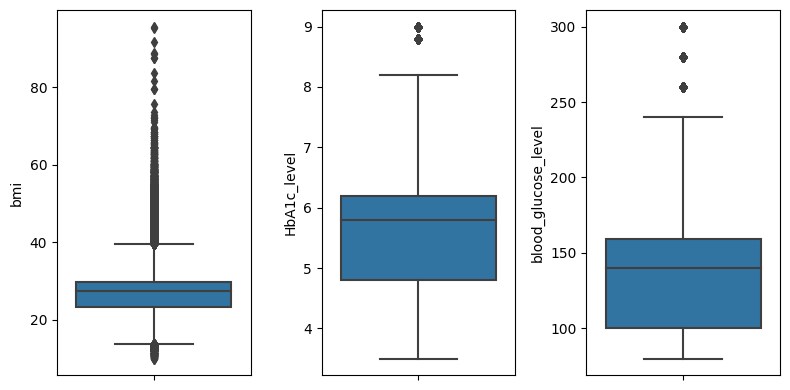

In [ ]:
#Create subplot to visualize outliers
fig, axes = plt.subplots(1,3, figsize=(8,4))

sns.boxplot(y=data['bmi'], ax=axes[0])

sns.boxplot(y=data['HbA1c_level'], ax=axes[1])

sns.boxplot(y=data['blood_glucose_level'], ax=axes[2])

plt.tight_layout()


In [6]:
#Create function to calculate the upper limit, lower limit, number of outliers and their % in dataset for each specified column
def calculate_outliers(df, column_names):
    """
    Calculate upper limit, lower limit, number of outliers and the % in dataset for each specified column .

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data and need to calculate outliers
    - column_names (list): A list of column names to analyze for outliers.

    Returns:
    - pd.DataFrame: A DataFrame containing information about outliers for each specified column.
      Columns: ['Column', 'Number of Outliers', '% Outliers', 'Lower Limit', 'Upper Limit']
    """

    # Calculate the number of columns and rows for subplots
    col_len = len(column_names)
    if col_len % 2 == 0:
      num_columns = 2
      num_rows = col_len // 2
    else:
      num_columns = col_len
      num_rows = 1


    # Initialize a list to store outlier information for each column
    outlier_data = []

    # Iterate over column_names and create subplots
    for i, column_name in enumerate(column_names):
        data = df[column_name]

        # Calculate quartiles and interquartile range using np.percentile
        q1, q3 = np.percentile(data, [25, 75])
        iqr = q3 - q1

        # Define lower and upper limits for outlier detection
        low_lim, upp_lim = q1 - 1.5 * iqr, q3 + 1.5 * iqr

        # Find and display outliers
        outliers = df[(data < low_lim) | (data > upp_lim)][column_name]
        num_outliers = len(outliers)
        percent_outliers = round(num_outliers / len(df) * 100, 1)

        # Append outlier information to the list
        outlier_data.append([column_name, num_outliers, percent_outliers, round(low_lim, 1), round(upp_lim, 1)])


    # Combine the outlier information into a DataFrame
    outlier_df = pd.DataFrame(outlier_data,
                              columns = ['Column', 'Number of Outliers', '% Outliers', 'Lower Limit', 'Upper Limit'])
    return outlier_df

In [7]:
#Create list of columns need to be check outliers
col_names = ['bmi', 'HbA1c_level', 'blood_glucose_level']
#use function `dectect_outliers` to detect and visualize outliers
outliers_table = calculate_outliers(data,col_names)
#Display outliers table
outliers_table

,Column,Number of Outliers,% Outliers,Lower Limit,Upper Limit
0,bmi,5354,5.60000,13.70000,39.60000
1,HbA1c_level,1312,1.40000,2.70000,8.30000
2,blood_glucose_level,2031,2.10000,11.50000,247.50000


There are no evidences or information to prove these outliers are typos or error when collecting data. In addition, these metrics can be a strong indicator of diabetes. Therefore, we will keep these outliers untouched at this stage.


# **3. Analyze Stage**
---

## **3.1. Explore the target variable distribution**
---

In [8]:
#Get the number of people have diabetes vs. not
print(data['diabetes'].value_counts())

#Get percentage of people have diabetes vs. not
print(data['diabetes'].value_counts(normalize=True))


0    87664
1     8482
Name: diabetes, dtype: int64
0   0.91178
1   0.08822
Name: diabetes, dtype: float64


There are heavily imbalanced in the dataset when the number of people have diabetes only accounts for 8.8% of the dataset.

## **3.2. Explore independent variables**
---

### ***3.2.1. `gender` variable***
---

In [ ]:
#Count number of each value in `gender`
data['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In order to simplify this project, we will assump that there only 2 biological gender in this dataset, which means we will remove the *'other'* value out of `gender` column. It won't affect too much due to small number of entries (~0.018%) of the dataset.

In [9]:
#Create a dataset without 'other' value in `gender` column
df = data[data['gender'] != 'Other']
#Check shape of new dataset
df.shape

(96128, 9)

In [ ]:
#Create sub-dataframe of proportion of diabetes status per gender
gender_df = df.groupby(['gender'],as_index=False)['diabetes'].value_counts(normalize=True)

#Display the sub-dataframe
gender_df

,gender,diabetes,proportion
0,Female,0,0.92082
1,Female,1,0.07918
2,Male,0,0.89904
3,Male,1,0.10096


In [ ]:
#VISUALIZE THE SUB-DATAFRAME
#Create group bar chart for visualisation
gender_bar = px.histogram(gender_df,
               x='gender',
               y='proportion',
               title='<b>Diabetes percentage per gender</b>',
               color='diabetes',
               color_discrete_sequence=['#FF6969','#94A684'],
               barmode='group',
               )

gender_bar.update_layout(xaxis=dict(title='<b>GENDER</b>',
                               linecolor='grey',
                               gridcolor='lightgrey',
                               griddash='dot'),
                    yaxis=dict(title='<b>PERCENTAGE</b>',
                               range=[0,1],
                               linecolor='grey',
                               gridcolor='lightgrey',
                               griddash='dot',
                               mirror=True),
                    plot_bgcolor='white')

gender_bar.show()

The percentage of diabetes appears on male (10.1%) is higher than on female (7.9%)

### ***3.2.2. `smoking_history` variable***
---

In [ ]:
#Count each value in `smoking_history` column
df['smoking_history'].value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

Approximately 70% of the dataset has value either 'never' or 'No Info' for `smoking_history` variable.

In [ ]:
#Create sub-dataframe of diabetes status per `smoking_history`.
smoke_df = df.groupby(['smoking_history'],as_index=False)['diabetes'].value_counts(normalize=True)

#Display sub-dataframe
smoke_df.head()

,smoking_history,diabetes,proportion
0,No Info,0,0.95605
1,No Info,1,0.04395
2,current,0,0.89692
3,current,1,0.10308
4,ever,0,0.88191


In [ ]:
#Create group bar chart for visualisation
smoke_bar = px.histogram(smoke_df,
               x='smoking_history',
               y='proportion',
               title='<b>Diabetes per smoking history status</b>',
               color='diabetes',
               color_discrete_sequence=['#FF6969','#94A684'],
               barmode='group'
               )

smoke_bar.update_layout(xaxis=dict(title='<b>SMOKING STATUS</b>',
                               linecolor='grey',
                               gridcolor='lightgrey',
                               griddash='dot'),
                    yaxis=dict(title='<b>PROPORTION</b>',
                               range=[0,1],
                               linecolor='grey',
                               gridcolor='lightgrey',
                               griddash='dot',
                               mirror=True),
                    plot_bgcolor='white')

smoke_bar.show()

It seems like whoever was a former smoker tends to have higher percentage of getting diabetes ~ 17%. Except the group of 'No Info', patients who are qualified as 'never' smoker have lower percentage of getting diabetes ~ 9.7%.

### ***3.2.3. `age` variable***
---

In [ ]:
#Create sub-dataframe that only contains patients having diabetes
diabetes_df = df[df['diabetes'] == 1]
#Display sub-dataframe
diabetes_df['diabetes'].value_counts()

1    8482
Name: diabetes, dtype: int64

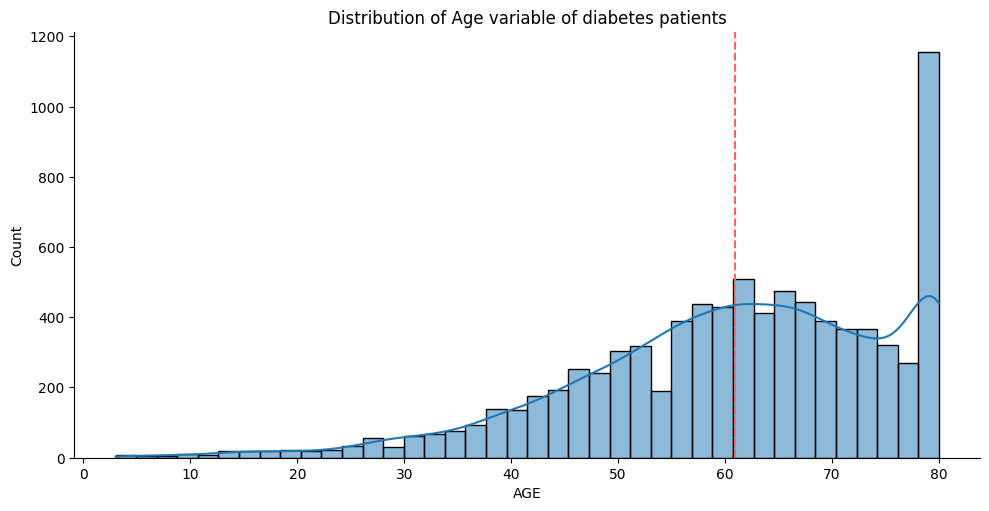

In [ ]:
#Create distribution plot of the `age` variable for patients having diabetes
sns.displot(diabetes_df['age'],
            aspect=2,
            kde=True)

#Create title of the plot
plt.title(f"Distribution of Age variable of diabetes patients")

#Create xlabel
plt.xlabel('AGE')

#Create line at age mean of the sub-dataframe
plt.axvline(x = diabetes_df['age'].mean(),
            color='#ff6361',
            ls='--')
plt.show()

Age distribution of diabetes patients is heavily left skewed. It seems like people tends to have diabetes when they get older, especially after 60 years old.

The preceding plot also show that when the age hit 78 and above, the chance of having diabetes is higher which is totally make sense.

### ***3.2.4. `bmi` variable***
---

    In general, `bmi` is used to classify different weight types:
     - underweight: < 18.5
     - optimum range: 18.5 - 24.9
     - overweight: 25 - 29.9
     - class I obesity: 30 - 34.9
     - class II obesity: 35 - 39.9
     - class III obesity: > 40


In [ ]:
#Add column name `weight_class` based on the `bmi`
df['weight_class'] = pd.cut(x= df['bmi'],
                            bins= [10, 18.4, 24.9, 29.9, 34.9, 39.9, 100],
                            labels = ['underweight', 'normal', 'overweight', 'class I obesity', 'class II obesity', 'class III obesity'])

#Double check the data
df[['bmi','weight_class']].head(10)

<ipython-input-11-52a12fe7a1b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight_class'] = pd.cut(x= df['bmi'],


,bmi,weight_class
0,25.19000,overweight
1,27.32000,overweight
2,27.32000,overweight
3,23.45000,normal
4,20.14000,normal
5,27.32000,overweight
6,19.31000,normal
7,23.86000,normal
8,33.64000,class I obesity
9,27.32000,overweight


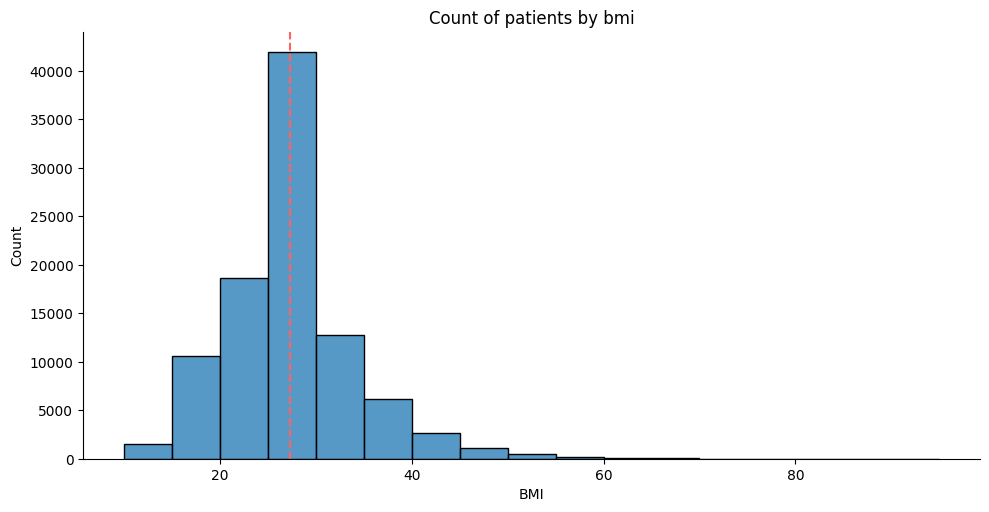

In [ ]:
#Visulize distribution of `bmi` variable of dataset
sns.displot(df,
            x='bmi',
            bins=range(10,100,5),
            aspect=2)

#Create title of the plot
plt.title("Count of patients by bmi")

#Create xlabel
plt.xlabel('BMI')

#Create line at bmi median of dataset
plt.axvline(x = df['bmi'].median(),
            color='#ff6361',
            ls='--')
plt.show()

The distribution is lightly right skewed with half of the patients in the dataset are **overweight** or having **obesity**. There also a minority that have really serious **obesity** problem when their BMI is over 60.



In [ ]:
#Create sub data-frame to visualize
weight_df = df.groupby(['weight_class'],as_index=False)['diabetes'].value_counts(normalize=True)

In [ ]:
#Create group bar chart for visualisation
weight_bar = px.histogram(weight_df,
               x='weight_class',
               y='proportion',
               title='<b>Diabetes per weight class</b>',
               color='diabetes',
               color_discrete_sequence=['#FF6969','#94A684'],
               barmode='group'
               )

weight_bar.update_layout(xaxis=dict(title='<b>WEIGHT CLASS</b>',
                               linecolor='grey',
                               gridcolor='lightgrey',
                               griddash='dot'),
                    yaxis=dict(title='<b>PROPORTION</b>',
                               range=[0,1],
                               linecolor='grey',
                               gridcolor='lightgrey',
                               griddash='dot',
                               mirror=True),
                    plot_bgcolor='white')

weight_bar.show()

There are no surprise here when higher weight class has higher percentage to have diabetes. Especially for **class III obesity**, one fourth of the patients were diagnosed diabetes.

### ***3.2.5. `HbA1c_level` variable***
---

    According to The American Diabetes Association, they categorized Hemoglobin A1c like below:
     - Normal: <= 5.6
     - Prediabetes: 5.7 - 6.4
     - Diabetes: 6.5 - 9
     - Serious diabetes: >9

In [ ]:
#Check unique value of `HbA1c_level`
df['HbA1c_level'].value_counts()

6.60000    8161
5.70000    8123
6.50000    8051
5.80000    7992
6.00000    7987
6.20000    7956
6.10000    7712
3.50000    7316
4.80000    7296
4.50000    7289
4.00000    7204
5.00000    7153
8.80000     660
8.20000     659
9.00000     652
7.50000     642
6.80000     642
7.00000     633
Name: HbA1c_level, dtype: int64

In [11]:
#Add column name `weight_class` based on the `bmi`
df['A1c_status'] = pd.cut(x= df['HbA1c_level'],
                            bins= [0, 5.6, 6.4, 9, 10],
                            labels = ['normal', 'prediabetes', 'diabetes', 'serious diabetes'])

#Double check the data
df[['HbA1c_level','A1c_status']].head(10)

<ipython-input-11-72dad1b3ff08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['A1c_status'] = pd.cut(x= df['HbA1c_level'],


,HbA1c_level,A1c_status
0,6.60000,diabetes
1,6.60000,diabetes
2,5.70000,prediabetes
3,5.00000,normal
4,4.80000,normal
5,6.60000,diabetes
6,6.50000,diabetes
7,5.70000,prediabetes
8,4.80000,normal
9,5.00000,normal


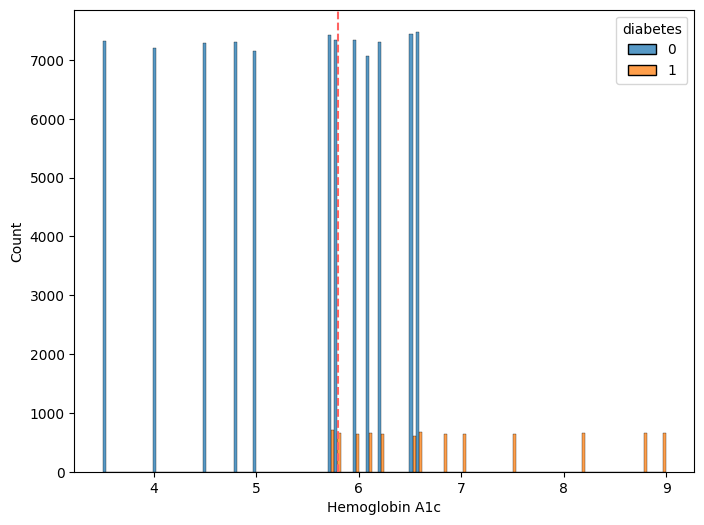

In [ ]:
#Visualize distribution of `HbA1c_level` of the dataset
plt.figure(figsize=(8,6))

sns.histplot(data=df, x='HbA1c_level', hue='diabetes', multiple='dodge')

plt.xlabel('Hemoglobin A1c')

plt.axvline(x = df['HbA1c_level'].median(),
            color='#ff6361',
            ls='--')


plt.show()

The preceding plot shows that half of the patients in dataset have Hemoglobin A1c at level of prediabetes and diabetes. In addition,  100% of patients have Hemoglobin A1c above 6.8 were diagnosed diabetes.

In [ ]:
#Create sub data-frame to visualize
A1c_df = df.groupby(['A1c_status'],as_index=False)['diabetes'].value_counts(normalize=True)

In [ ]:
#Create group bar chart for visualisation
A1c_bar = px.histogram(A1c_df,
               x='A1c_status',
               y='proportion',
               title='<b>Diabetes per A1c status</b>',
               color='diabetes',
               color_discrete_sequence=['#FF6969','#94A684'],
               barmode='group'
               )

A1c_bar.update_layout(xaxis=dict(title='<b>A1c STATUS</b>',
                               linecolor='grey',
                               gridcolor='lightgrey',
                               griddash='dot'),
                    yaxis=dict(title='<b>PROPORTION</b>',
                               range=[0,1],
                               linecolor='grey',
                               gridcolor='lightgrey',
                               griddash='dot',
                               mirror=True),
                    plot_bgcolor='white')

A1c_bar.show()

### ***3.2.6. `hypertension` variable***
---

In [ ]:
#Check the balance of `hypertension` variable
df['hypertension'].value_counts()

0    88667
1     7461
Name: hypertension, dtype: int64

In [ ]:
#Create sub-dataframe to view diabetes status in each group of `hypertension`
hyper_df = df.groupby(['hypertension'], as_index=False)['diabetes'].value_counts(normalize=True)

#Display the sub-dataframe
hyper_df.head()

,hypertension,diabetes,proportion
0,0,0,0.92786
1,0,1,0.07214
2,1,0,0.72041
3,1,1,0.27959


In [ ]:
#Create group bar chart for visualisation
hyper_bar = px.histogram(hyper_df,
               x='hypertension',
               y='proportion',
               title='<b>Diabetes per hypertension</b>',
               color='diabetes',
               color_discrete_sequence=['#FF6969','#94A684'],
               barmode='group'
               )

hyper_bar.update_layout(xaxis=dict(title='<b>HYPERTENSION</b>',
                               linecolor='grey',
                               gridcolor='lightgrey',
                               griddash='dot'),
                    yaxis=dict(title='<b>PROPORTION</b>',
                               range=[0,1],
                               linecolor='grey',
                               gridcolor='lightgrey',
                               griddash='dot',
                               mirror=True),
                    plot_bgcolor='white')

hyper_bar.show()

According to the plot, patients that have hypertension are approximately 4 times higher of getting diabetes.

### ***3.2.7. `heart_disease` variable***
---

In [ ]:
#Check balance of patients having heart disease
df['heart_disease'].value_counts()

0    92205
1     3923
Name: heart_disease, dtype: int64

In [ ]:
#Create sub-dataframe to view diabetes status if they either have or don't have heart disease
heart_df = df.groupby(['heart_disease'], as_index=False)['diabetes'].value_counts(normalize=True)

#Display the sub-dataframe
heart_df.head()

,heart_disease,diabetes,proportion
0,0,0,0.92175
1,0,1,0.07825
2,1,0,0.67703
3,1,1,0.32297


In [ ]:
#Create group bar chart for visualisation
heart_bar = px.histogram(heart_df,
               x='heart_disease',
               y='proportion',
               title='<b>Diabetes proportion with heart disease condition</b>',
               color='diabetes',
               color_discrete_sequence=['#FF6969','#94A684'],
               barmode='group'
               )

heart_bar.update_layout(xaxis=dict(title='<b>HEART DISEASE</b>',
                               linecolor='grey',
                               gridcolor='lightgrey',
                               griddash='dot'),
                    yaxis=dict(title='<b>PROPORTION</b>',
                               range=[0,1],
                               linecolor='grey',
                               gridcolor='lightgrey',
                               griddash='dot',
                               mirror=True),
                    plot_bgcolor='white')

heart_bar.show()

We can clearly see the relationship between heart disease and diabetes. Patients who have heart diseases are almost 5 times higher of getting diabetes.

### ***3.2.8. `blood_glucose_level` variable***
---

In [ ]:
#Check value count of `blood_glucose_level`
df['blood_glucose_level'].value_counts()

159    7475
130    7471
126    7419
140    7414
160    7393
145    7371
200    7289
155    7285
90     6820
80     6785
100    6774
158    6737
85     6631
280     724
300     673
260     634
240     633
220     600
Name: blood_glucose_level, dtype: int64

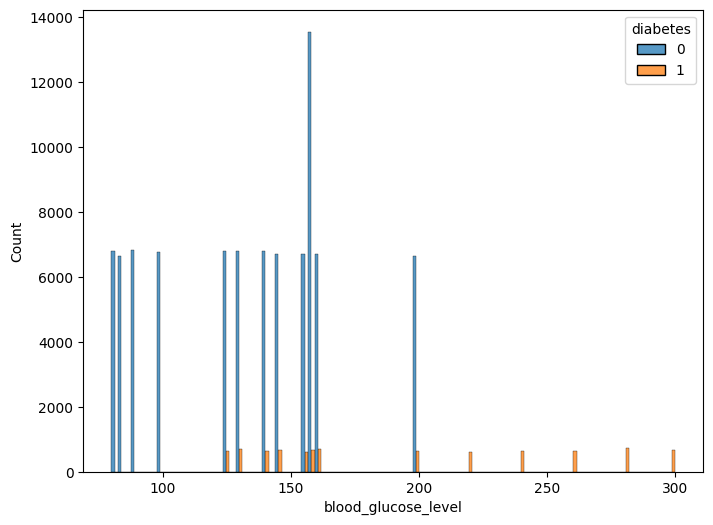

In [ ]:
#Visualize distribution of `blood_glucose_level` of the dataset
plt.figure(figsize=(8,6))

sns.histplot(data=df, x='blood_glucose_level', hue='diabetes', multiple='dodge')

plt.show()

Patients have blood glucose level below 125 are safe from diabetes. On the other hand, patients who have blood glucose level above 200 are 100% getting diabetes.

## **3.3. Explore relationship between variables**
---

### ***3.3.1. Discover `gender` relationship with `age` and `bmi`***
---

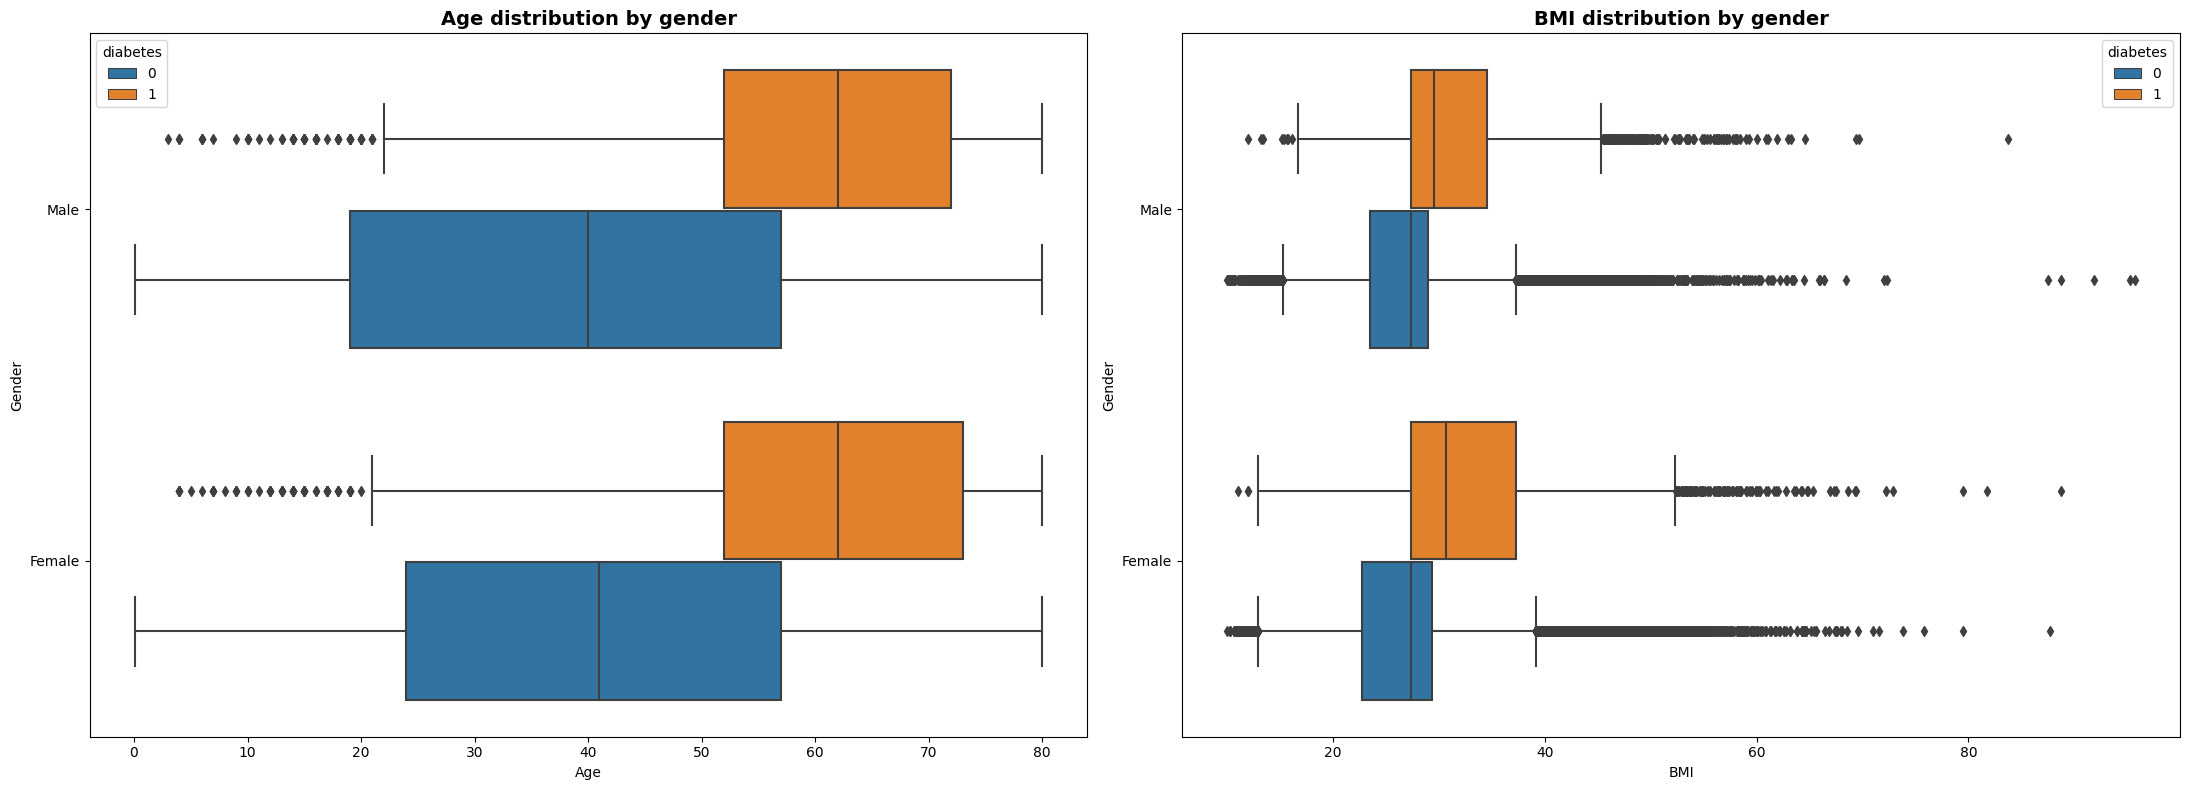

In [ ]:
#Set figure and axes
fig, ax = plt.subplots(1,2, figsize= (22,8))

#Create boxplot showing distribution of `age` by `gender`, comparing patients who have diabetes vs those who don't
sns.boxplot(data=df, x='age', y='gender', hue='diabetes', orient='h', ax=ax[0])
ax[0].invert_yaxis()
#Set plot title, axis label
ax[0].set_title('Age distribution by gender', weight='bold', fontsize=14)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Gender')
#Set legend location
# ax[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#Create boxplot showing distribution of `bmi` by `gender`, comparing patients who have diabetes vs those who don't
sns.boxplot(data=df, x='bmi', y='gender', hue='diabetes', orient='h', ax=ax[1])
ax[1].invert_yaxis()
#Set plot title, axis label
ax[1].set_title('BMI distribution by gender', weight='bold', fontsize=14)
ax[1].set_xlabel('BMI')
ax[1].set_ylabel('Gender')
#Set legend location
# ax[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#Show plot
plt.tight_layout()


From preceding plot, age and BMI distribution in either diabetes group or normal group, are the same among the gender.

### ***3.3.2. Correlation Heatmap***
---

<ipython-input-29-44c53720a849>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))


Text(0.5, 1.0, 'Correlation Heatmap')

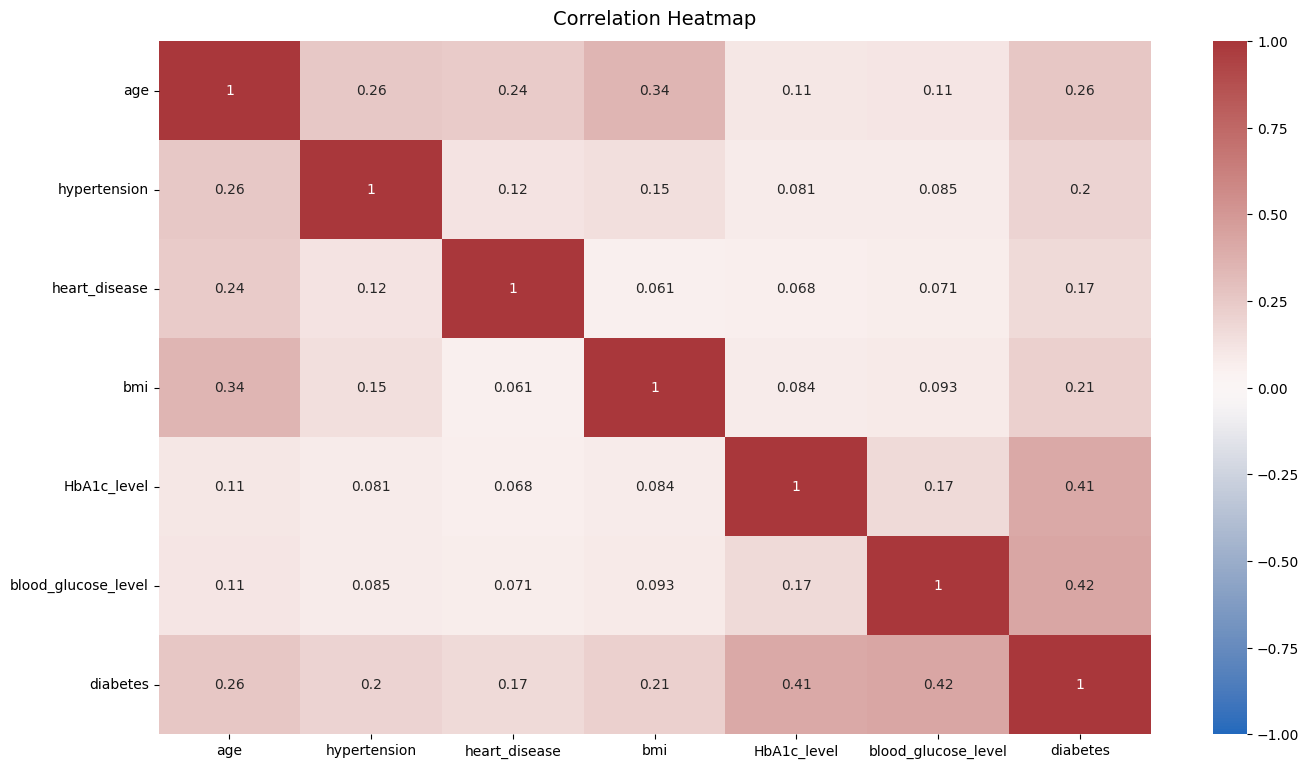

In [ ]:
#Plot a correlation heatmap
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)

The correlation heatmap confirms  that all variables have some positive correlation with each other and all independent variables have positive impact to target variable which is `diabetes`

# **4. Construct Stage**
---

## **4.1. Identify the type of prediction task**
---

The goal of this project is to predict diabetes in patients based on their medical history and demographic information, which is a categorical outcome variable. Thus, this task involves binary classification, since the outcome variable `diabetes` can be either 1 (indicating patient has diabetes) or 0 (indicating patient doesn't have diabetes)

## **4.2. Identify the types of models approriate for this task**
---

Since the outcome variable that project wants to predict (whether a patient has diabetes) is categorical, **logistic regression model**, or a **machine learning model** (Random Forest, Tree-based, XGBoost) will be a suitable choice.

In this project, I am going to implement all approaches and determine how they compare.

## **4.3. Model Building**
---

### ***4.3.1. Set up 'pickle' for writing and reading result***
---

In [37]:
# Define a path to the folder where you want to save the model
path = '/content/gdrive/MyDrive/Diabetes disease prediction'

In [38]:
#Define functions to pickle the model and read in the model.
def write_pickle(path, model_object, save_as:str):
  '''
  In:
    path: path of folder where you want to save the pickle
    model_object: a model you want to pickle
    save_as: filename for how you want to save the model
    Out: A call to pickle the model in the folder indicated
  '''
  with open(path + save_as + '.pickle', 'wb') as to_write:
    pickle.dump(model_object, to_write)

In [39]:
def read_pickle(path, saved_model_name:str):
  '''
  In:
    path: path to folder where you want to read from
    saved_model_name: filename of pickled model you want to read in
    Out:
    model: the pickled model
  '''
  with open(path + saved_model_name + '.pickle', 'rb') as to_read:
    model = pickle.load(to_read)

  return model

### ***4.3.2. Encode non-numeric variables***
---

In [12]:
#Copy the dataframe
df_enc = df.copy()

#Encode the `weight_class` column as an ordinal numeric category
df_enc['weight_class'] = df_enc['weight_class'].astype('category').cat.set_categories(['underweight','normal','overweight','class I obesity','class II obesity','class III obesity']).cat.codes

#Encode the `A1c_status` column as an ordinal numeric category
df_enc['A1c_status'] = df_enc['A1c_status'].astype('category').cat.set_categories(['normal','prediabetes','diabetes','serious diabetes']).cat.codes

#Dummy encode `gender` and `smoking_history` columns
df_enc = pd.get_dummies(df_enc,drop_first=False)

#Display the new dataframe
df_enc.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,weight_class,A1c_status,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.00000,0,1,25.19000,6.60000,140,0,2,2,1,0,0,0,0,0,1,0
1,54.00000,0,0,27.32000,6.60000,80,0,2,2,1,0,1,0,0,0,0,0
2,28.00000,0,0,27.32000,5.70000,158,0,2,1,0,1,0,0,0,0,1,0
3,36.00000,0,0,23.45000,5.00000,155,0,1,0,1,0,0,1,0,0,0,0
4,76.00000,1,1,20.14000,4.80000,155,0,1,0,0,1,0,1,0,0,0,0


In [ ]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96128 entries, 0 to 96145
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          96128 non-null  float64
 1   hypertension                 96128 non-null  int64  
 2   heart_disease                96128 non-null  int64  
 3   bmi                          96128 non-null  float64
 4   HbA1c_level                  96128 non-null  float64
 5   blood_glucose_level          96128 non-null  int64  
 6   diabetes                     96128 non-null  int64  
 7   weight_class                 96128 non-null  int8   
 8   A1c_status                   96128 non-null  int8   
 9   gender_Female                96128 non-null  uint8  
 10  gender_Male                  96128 non-null  uint8  
 11  smoking_history_No Info      96128 non-null  uint8  
 12  smoking_history_current      96128 non-null  uint8  
 13  smoking_history_

### ***4.3.3. Modeling Approach A: Logistic Regression Model***
---

#### *4.3.3.1. Model assumptions*
---

##### **Independent observation**
----

Each patient and their medical and demographic data was collected independently so this assumption is not violated.

##### **No extreme outliers**
----

Since we will use Logistics regession and it is quite sensitive to outliers, thus it would be good idea to remove outliers in the `blood_glucose_level` column.


In [240]:
outliers_table

,Column,Number of Outliers,% Outliers,Lower Limit,Upper Limit
0,bmi,5354,5.60000,13.70000,39.60000
1,HbA1c_level,1312,1.40000,2.70000,8.30000
2,blood_glucose_level,2031,2.10000,11.50000,247.50000


In [241]:
#Set variable for upper and lower limit of `blood_glucose_level`
glucose_lower_limit = outliers_table.loc[2,'Lower Limit']
glucose_upper_limit = outliers_table.loc[2,'Upper Limit']

#Create a boolean mask
mask = (df_enc['blood_glucose_level'] >= glucose_lower_limit) & (df_enc['blood_glucose_level'] <= glucose_upper_limit)

#Create dataframe without outliers in `blood_glucose_level` column
df_logreg = df_enc[mask]

#Check shape of new dataframe
df_logreg.shape

(94097, 17)

In [52]:
#Display first few rows of new dataframe
df_logreg.head(10)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,weight_class,A1c_status,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.00000,0,1,25.19000,6.60000,140,0,2,2,1,0,0,0,0,0,1,0
1,54.00000,0,0,27.32000,6.60000,80,0,2,2,1,0,1,0,0,0,0,0
2,28.00000,0,0,27.32000,5.70000,158,0,2,1,0,1,0,0,0,0,1,0
3,36.00000,0,0,23.45000,5.00000,155,0,1,0,1,0,0,1,0,0,0,0
4,76.00000,1,1,20.14000,4.80000,155,0,1,0,0,1,0,1,0,0,0,0
5,20.00000,0,0,27.32000,6.60000,85,0,2,2,1,0,0,0,0,0,1,0
6,44.00000,0,0,19.31000,6.50000,200,1,1,2,1,0,0,0,0,0,1,0
7,79.00000,0,0,23.86000,5.70000,85,0,1,1,1,0,1,0,0,0,0,0
8,42.00000,0,0,33.64000,4.80000,145,0,3,0,0,1,0,0,0,0,1,0
9,32.00000,0,0,27.32000,5.00000,100,0,2,0,1,0,0,0,0,0,1,0


##### **No multicollinearity**
----

As the correlation heatmap above, there are no extreme correlation between any variables, so this assumption is met.

##### **Linearity**
----

As we analyzed all independent variables above and according to correlation heatmap, all independent variables have linear relationship. So this assumption is not violated.

#### *4.3.3.2. Split dataset*
---

Steps as below:
  1. Define a variable **X** that isolates the features.
  2. Define a variable **y** that isolates the target variable.
  3. Split the data 75/25 into training set and test set.

In [242]:
#Isolate the outcome variable
y = df_logreg['diabetes']

#Display first few rows of the outcome variable
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [243]:
#Select features to use in model and save in X
X = df_logreg.drop(['diabetes','HbA1c_level','bmi'], axis=1)

#Display first few rows of the selected features
X.head()

,age,hypertension,heart_disease,blood_glucose_level,weight_class,A1c_status,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.00000,0,1,140,2,2,1,0,0,0,0,0,1,0
1,54.00000,0,0,80,2,2,1,0,1,0,0,0,0,0
2,28.00000,0,0,158,2,1,0,1,0,0,0,0,1,0
3,36.00000,0,0,155,1,0,1,0,0,1,0,0,0,0
4,76.00000,1,1,155,1,0,0,1,0,1,0,0,0,0


In [244]:
#Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, stratify=y,random_state=40)

#### *4.3.3.3. Construct logistic regression model with imbalanced dataset*
---

In [245]:
#Construct logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(max_iter=1000, random_state=40).fit(X_train,y_train)

In [246]:
#Use the logistic regression model to get prediction on the test set
y_pred = log_clf.predict(X_test)

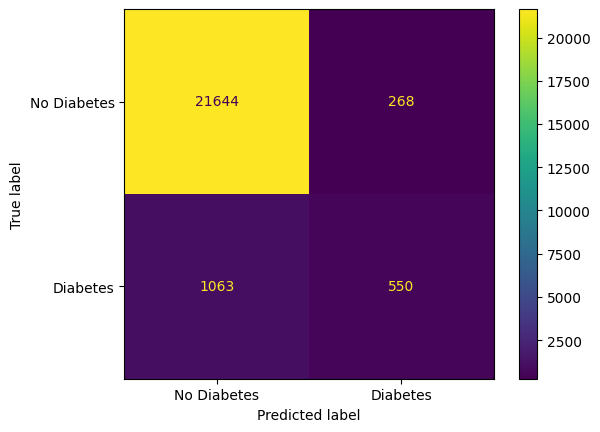

In [247]:
##Create a confusion matrix to visualize the results of the logistic regression model.
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=['No Diabetes','Diabetes'])

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [248]:
# Create classification report for logistic regression model
target_names = ['Predicted would not have diabetes', 'Predicted would have diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                                   precision    recall  f1-score   support

Predicted would not have diabetes       0.95      0.99      0.97     21912
    Predicted would have diabetes       0.67      0.34      0.45      1613

                         accuracy                           0.94     23525
                        macro avg       0.81      0.66      0.71     23525
                     weighted avg       0.93      0.94      0.93     23525



The classification report above shows that the logistic regression model achieved a precision of 93%, recall of 94%, f1-score of 93% (all weighted average), and accuracy of 94%. However, in this project, it is most important to predict patients who have diabetes, the scores are significantly low, especially recall score which are the most important metric to consider in this project.

It seems like the model doesn't fit well as our expectation, maybe due to imbalancing dataset. Hence, we will try to rebalance the dataset and refit the model.

#### *4.3.3.4. Construct logistic regression model with balanced dataset*
---

##### **Upsampling dataset**
----

In [249]:
#Combine X_train and y_train
train_data = pd.concat([X_train,y_train], axis=1).reset_index(drop=True)
#Display first few rows of data
train_data.head()

,age,hypertension,heart_disease,blood_glucose_level,weight_class,A1c_status,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes
0,31.00000,0,0,85,2,2,1,0,0,0,1,0,0,0,0
1,40.00000,0,0,158,1,0,1,0,0,0,0,1,0,0,0
2,75.00000,0,0,158,1,1,0,1,0,0,0,0,1,0,0
3,17.00000,0,0,145,3,1,1,0,0,0,0,0,1,0,0
4,23.00000,0,0,159,1,0,0,1,0,0,0,0,1,0,0


In [250]:
# Separate majority and minority classes
majority_class = train_data[train_data['diabetes'] == 0]
minority_class = train_data[train_data['diabetes'] == 1]

In [251]:
# Upsampling the minority class
minority_upsampled = resample(minority_class, replace = True, n_samples = len(majority_class), random_state = 40)
# Combine majority class with upsampled minority class
balanced_data = pd.concat([majority_class, minority_upsampled])

In [252]:
#Split balance data to X_train and y_train
X_balanced_train = balanced_data.drop('diabetes',axis=1)
y_balanced_train = balanced_data['diabetes']

##### **Re-construct logistic regression**
----

In [253]:
#Refit the model
new_log_clf = LogisticRegression(max_iter=1000,random_state=40).fit(X_balanced_train, y_balanced_train)

In [254]:
#Use the new logistic regression model to get prediction on the test set
y1_pred = new_log_clf.predict(X_test)

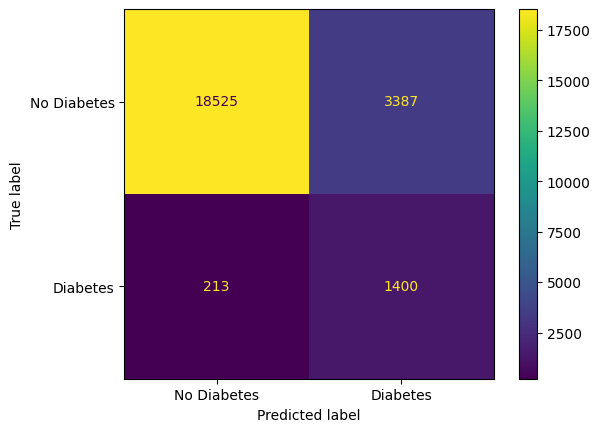

In [255]:
##Create a confusion matrix to visualize the results of the logistic regression model.
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y1_pred, labels=new_log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=['No Diabetes','Diabetes'])

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [256]:
# Create classification report for new logistic regression model
target_names = ['Predicted would not have diabetes', 'Predicted would have diabetes']
print(classification_report(y_test, y1_pred, target_names=target_names))

                                   precision    recall  f1-score   support

Predicted would not have diabetes       0.99      0.85      0.91     21912
    Predicted would have diabetes       0.29      0.87      0.44      1613

                         accuracy                           0.85     23525
                        macro avg       0.64      0.86      0.67     23525
                     weighted avg       0.94      0.85      0.88     23525



Comparing to results before balancing the dataset, recall, f1-score and accuracy have lower score which are 85%, 88% and 85% respectively (all weighted average).

The recall score when predicting patients who would have diabetes is 87% which is considerably high. In contrast, due to upsampling, the model over-recognized the minority class which shows in low precision score (29%) when predicting patients would have diabetes.



In the real life, if the model fails to capture patients who have diabetes, the consequences is much higher than when the model fails to capture patients who don't have diabetes.

The reason is that, when patients are predicted to have diabetes, if that is true, they can receive the proper treatment timely. In case the prediction is not correct, there are no real consequences happen to patients except they may waste their time and money for testing.

On the contrary, when patients are predicted would not have diabetes in case they do have diabetes, patients may face serious consequences when they don't have proper treatment timely.

##### **Visualize the feature importance**
----

In [257]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_balanced_train.columns, new_log_clf.coef_[0]))
# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('A1c_status', 2.0625842801101406),
 ('hypertension', 0.7799763076761826),
 ('heart_disease', 0.6348663515843835),
 ('weight_class', 0.510421303713222),
 ('age', 0.050220062611383266),
 ('blood_glucose_level', 0.028449390835910776),
 ('smoking_history_current', -0.8661007482854889),
 ('smoking_history_former', -0.9556221506667504),
 ('smoking_history_ever', -0.9657570017327518),
 ('smoking_history_never', -1.0741678371820051),
 ('smoking_history_not current', -1.0989251494979446),
 ('smoking_history_No Info', -1.467308817929692),
 ('gender_Male', -3.079986478737127),
 ('gender_Female', -3.347895226556656)]

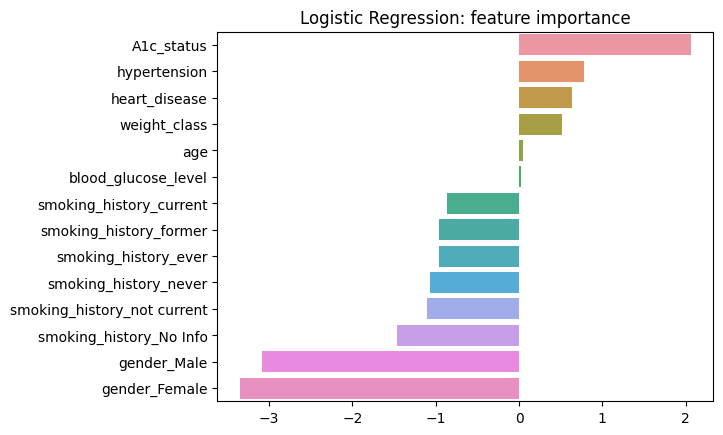

In [258]:
# Plot the feature importances
sns.barplot(x=[x[1] for x in feature_importance],
y=[x[0] for x in feature_importance],
orient='h')
plt.title('Logistic Regression: feature importance');

### ***4.3.4. Modeling Approach B: Decision Tree Model***
---

#### *4.3.4.1. Split dataset*
---

In [69]:
#Isolate outcome variable
y = df_enc['diabetes']

#Display first few rows of `y`
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [70]:
#Select features
X = df_enc.drop(['diabetes','HbA1c_level','bmi'], axis=1)

#Display first few rows of the selected features
X.head()

,age,hypertension,heart_disease,blood_glucose_level,weight_class,A1c_status,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.00000,0,1,140,2,2,1,0,0,0,0,0,1,0
1,54.00000,0,0,80,2,2,1,0,1,0,0,0,0,0
2,28.00000,0,0,158,2,1,0,1,0,0,0,0,1,0
3,36.00000,0,0,155,1,0,1,0,0,1,0,0,0,0
4,76.00000,1,1,155,1,0,0,1,0,1,0,0,0,0


In [71]:
#Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, stratify=y,random_state=40)

#### *4.3.4.2. Upsampling dataset*
---

In [16]:
#Combine X_train and y_train
train_data_2 = pd.concat([X_train,y_train], axis=1).reset_index(drop=True)
#Display first few rows of data
train_data_2.head()

,age,hypertension,heart_disease,blood_glucose_level,weight_class,A1c_status,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes
0,40.00000,0,1,80,4,0,1,0,1,0,0,0,0,0,0
1,48.00000,0,0,160,2,0,0,1,0,1,0,0,0,0,0
2,21.00000,0,0,159,1,0,1,0,0,0,0,0,1,0,0
3,49.00000,0,0,158,1,1,1,0,0,0,0,0,1,0,0
4,0.64000,0,0,126,1,0,0,1,1,0,0,0,0,0,0


In [18]:
# Separate majority and minority classes
majority_class_2 = train_data_2[train_data_2['diabetes'] == 0]
minority_class_2 = train_data_2[train_data_2['diabetes'] == 1]

In [19]:
# Upsampling the minority class
minority_upsampled_2 = resample(minority_class_2, replace = True, n_samples = len(majority_class_2), random_state = 40)
# Combine majority class with upsampled minority class
balanced_data_2 = pd.concat([majority_class_2, minority_upsampled_2])

In [20]:
#Split balance data to X_train and y_train
X_balanced_train_2 = balanced_data_2.drop('diabetes',axis=1)
y_balanced_train_2 = balanced_data_2['diabetes']

#### *4.3.4.3. Construct decision tree model*
---

In [158]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=40)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[3, 6],
'min_samples_leaf': [2, 5, 1],
'min_samples_split': [2, 4, 6]
}

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='recall')

In [159]:
%%time
tree1.fit(X_balanced_train_2, y_balanced_train_2)

CPU times: user 12.6 s, sys: 17.9 ms, total: 12.6 s
Wall time: 12.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'max_depth': [3, 6], 'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='recall',
             scoring={'recall', 'f1', 'accuracy', 'roc_auc', 'precision'})

In [160]:
#Check best param
tree1.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [161]:
#Check best recall score on CV
tree1.best_score_

0.929397196893214

This is a really high recall score, which means the model can predict 99.8% diabetes patients would have diabetes.

In [47]:
#Function to extract all the scores from the grid search
def make_results(model_name:str, model_object, metric:str):
  '''
  Arguments:
  model_name (string): what you want the model to be called in the output table
  model_object: a fit GridSearchCV object
  metric (string): precision, recall, f1, accuracy, or auc
  Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
  for the model with the best mean 'metric' score across all validation folds.
  '''
# Create dictionary that maps input metric to actual metric name in␣GridSearchCV
  metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy'
  }

  # Get all the results from the CV and put them in a df
  cv_results = pd.DataFrame(model_object.cv_results_)

  # Isolate the row of the df with the max(metric) score
  best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

  # Extract Accuracy, precision, recall, and f1 score from that row
  f1 = best_estimator_results.mean_test_f1
  recall = best_estimator_results.mean_test_recall
  precision = best_estimator_results.mean_test_precision
  accuracy = best_estimator_results.mean_test_accuracy

  # Create table of results
  table = pd.DataFrame()
  table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]})

  return table

In [162]:
#Get all CV score
tree1_cv_results = make_results('decision tree cv', tree1, 'recall')

tree1_cv_results

,model,precision,recall,F1,accuracy
0,decision tree cv,0.80840,0.92940,0.86468,0.85454


All of these scores from the decision tree model are strong indicators of good model performance.

Recall that decision tree can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make prediction. We should construct a random forest model next.

### ***4.3.5. Modeling Approach C: Random Forest Model***
---

In [106]:
# Instantiate model
rf = RandomForestClassifier(random_state=40)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,6],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
}

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [107]:
%%time
rf1.fit(X_balanced_train_2, y_balanced_train_2)

CPU times: user 2h 5min 23s, sys: 8.59 s, total: 2h 5min 32s
Wall time: 2h 6min 13s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=40),
             param_grid={'max_depth': [3, 6], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='recall',
             scoring={'recall', 'f1', 'accuracy', 'roc_auc', 'precision'})

In [108]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [109]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [110]:
# Check best recall score on CV
rf1.best_score_

0.9313597113458397

In [111]:
# Check best params
rf1.best_params_

{'max_depth': 3,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [126]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'recall')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision  recall      F1  accuracy
0  decision tree cv    0.85385 0.93462 0.89228   0.88717
              model  precision  recall      F1  accuracy
0  random forest cv    0.80767 0.93136 0.86512   0.85479


As we can see, the results from Random Forest model are slightly better than Decision Tree model across all metrics.

Comparing the result with the Logistic Regression model above, all scores improves quite a lot, especially **recall** score increases from 87% to 99.87%

### ***4.3.6. Modeling Approach D: XGBoost Model***
---

In [212]:
#Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=40)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [2,3],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300,500]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [213]:
#Fit data
%%time
xgb1.fit(X_balanced_train_2, y_balanced_train_2)

CPU times: user 5min 15s, sys: 947 ms, total: 5min 16s
Wall time: 3min 14s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=40, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [2, 3],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring={'precision', 'recall', 'f1', 'accuracy'})

In [214]:
#Write pickle
write_pickle(path,xgb1,'hr_xgb1')

In [215]:
#Read pickle
xgb1 = read_pickle(path,'hr_xgb1')

In [216]:
#Examine best score
xgb1.best_score_

0.9450359668696046

In [217]:
#Examine best parameter
xgb1.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'min_child_weight': 3,
 'n_estimators': 300}

In [218]:
#Call 'make_result()' on the GridSearch object
xgb1_cv_results = make_results('XGBoost cv', xgb1, 'recall')

#Display the results
xgb1_cv_results

,model,precision,recall,F1,accuracy
0,XGBoost cv,0.83298,0.94504,0.88546,0.87773


In [230]:
#Combine all results
results = pd.concat([tree1_cv_results,
                     rf1_cv_results,
                     xgb1_cv_results])

#Display the results
results

,model,precision,recall,F1,accuracy
0,decision tree cv,0.80840,0.92940,0.86468,0.85454
0,random forest cv,0.80767,0.93136,0.86512,0.85479
0,XGBoost cv,0.83298,0.94504,0.88546,0.87773


As we can see clearly from 'results' table above, the XGBoost model is the best at every metrics.

Precision, F1 and accuracy score are approximately 2% higher, while the most important metric in this project recall is almost 1.5% higher than the other 2 models.

Therefore, we will use the the XGBoost model to predict on the test dataset. This will help us to see how the model perform on unseen data.

### ***4.3.7. Use champion model to predict on test data***
---

In [223]:
#Get prediction on test data
xgb1_preds = xgb1.best_estimator_.predict(X_test)

In [225]:
#Define function to get score on test data
def get_scores(model_name:str, preds, y_test_data):
  '''
  Generate a table of test scores.
  In:
    model_name (string): How you want your model to be named in the output table
    preds: numpy array of test data
    y_test_data: numpy array of y_test data
  Out:
  table: pandas df of precision, recall, f1 and accuracy scores for your model
  '''

  accuracy = accuracy_score(y_test_data, preds)
  precision = precision_score(y_test_data, preds)
  recall = recall_score(y_test_data, preds)
  f1 = f1_score(y_test_data, preds)

  table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
  })
  return table

In [231]:
#Get scores on test data
xgb1_test_score = get_scores('XGBoost test', xgb1_preds, y_test)

In [232]:
#Append to the result table to view score
results = pd.concat([results, xgb1_test_score])
#Display results table
results

,model,precision,recall,F1,accuracy
0,decision tree cv,0.80840,0.92940,0.86468,0.85454
0,random forest cv,0.80767,0.93136,0.86512,0.85479
0,XGBoost cv,0.83298,0.94504,0.88546,0.87773
0,XGBoost test,0.33048,0.94764,0.49006,0.82602


**Recall** score is slighly better on test data, while **precision** and **f1** drop dramatically. This is expected because we trained model on the upsampled data while test data follows true distribution. **Accuracy** score aprroximately 5% less than on training data.

Considering **recall** is the most important metric in this project, this model works really well and can predict 94.77% out of patients have diabetes.

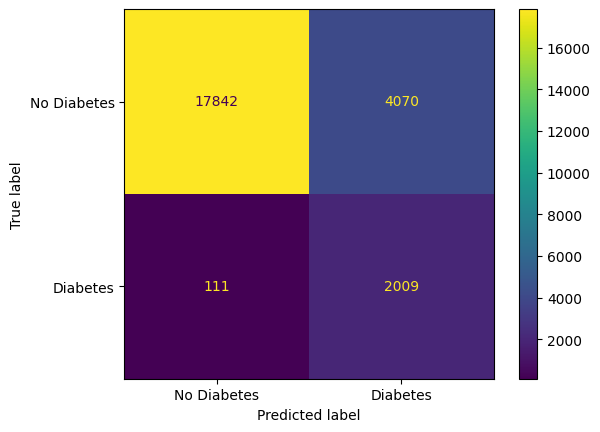

In [233]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb1_preds, labels=xgb1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Diabetes', 'Diabetes'])

disp.plot(values_format='');

The model predicts more false positive than false negative which means a lot of patients may be identifed as at risk of developing diabetes, when that's actually not the case. That's not gonna be a big problem in real life.

On the other hand, the model can predict the true positive really well which indicate this is a strong model for this projetc.

### ***4.3.8. Feature importance***
---

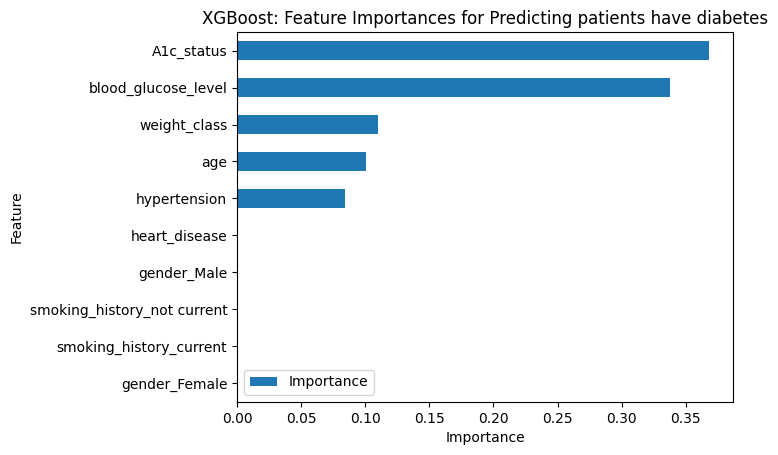

In [237]:
# Get feature importances
feat_impt = xgb1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")
ax1.set_title("XGBoost: Feature Importances for Predicting patients have diabetes", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot shows that in the XGBoost model, `A1c_status`, `blood_glucose_level`, `weight_class`, `age` and `hypertension` have the highest importance, in that order. These variables are most helpful in predicting if patient is in risk of developing diabetes.

# **5. Execute Stage**
---

## **5.1. Summary of model results**
---

### ***5.1.1. Logistic Regression***
---

The logistic regression model achieved precision of 94%, recall of 85%, f1 score of 88% (all weighted averages), and accuracy of 85%, on the test set

### ***5.1.2. Tree-based Machine Learning***
---

We conducted 3 models buiding where XGBoost model outperformed other two. It achieved precision of 33%, recall of 95%, f1 score of 49% and accuracy of 83%, on the test set.

## **5.2. Conclusion**
---

Either logistics regression model or XGBoost model, they all are great model to predict patients who are in risk of developing diabetes. It should be a good idea to test the model with selected group of patients in real work to get feedback.
